# Pymaceuticals Inc.

### Analysis  

* The dataset has various Mouse IDs, with an equal distribution of 51% male mice and 49% female mice. 
* The primary focus of the data is the treatment history of a specific mouse. 
* This mouse, shown by the unique ID g989, underwent the Propriva drug regimen, and the data illustrates its tumor volume over multiple timepoints.
* Over the course of these timepoints, there was an observed increase in tumor volume. 
* Additionally, there is a correlation between mouse weight and the average tumor volume. As mouse weight increases, the average tumor volume also tends to rise. 
* This suggests a positive relationship between these two variables within the context of the study.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()
print(num_mice)

249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate = combined_data[combined_data.duplicated(subset=["Mouse ID","Timepoint"])]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data.loc[combined_data.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data.loc[combined_data["Mouse ID"]== 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combined_data.loc[combined_data["Mouse ID"]!= 'g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_df["Mouse ID"].nunique()
print(num_mice)

248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Using the advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

mn=combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median=combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance=combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sd=combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem=combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# create a dataframe using a dictionary
Tumor_Summary = pd.DataFrame({"mean tumor volume":mn,"median tumor volume":median, "variance tumor volume":variance,"std tumor volume":sd, "sem tumor volume": sem})
Tumor_Summary
# create a dictionary named summary
# duplicate = combined_data[combined_data.duplicated(subset=["Mouse ID","Timepoint"])]

,mean tumor volume,median tumor volume,variance tumor volume,std tumor volume,sem tumor volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# summary_statistics = combined_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean','median', 'var', 'std', 'sem']})

## Bar and Pie Charts

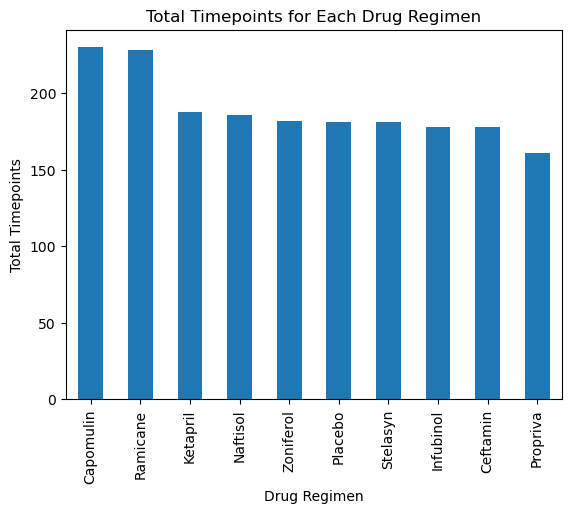

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas

# Group the data by "Drug Regimen" and count the number of rows (Mouse ID/Timepoints) in each group.
regimen_counts = combined_data["Drug Regimen"].value_counts()

# Create a bar plot using Pandas built-in plotting functionality.
# regimen_counts.plot(kind="bar", x_axis, Mouse_ID, Time_Points, color="blue") 
regimen_counts.plot(kind="bar")

# Set labels and title for the plot.
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")
plt.title("Total Timepoints for Each Drug Regimen")

# Show the plot.
plt.show()

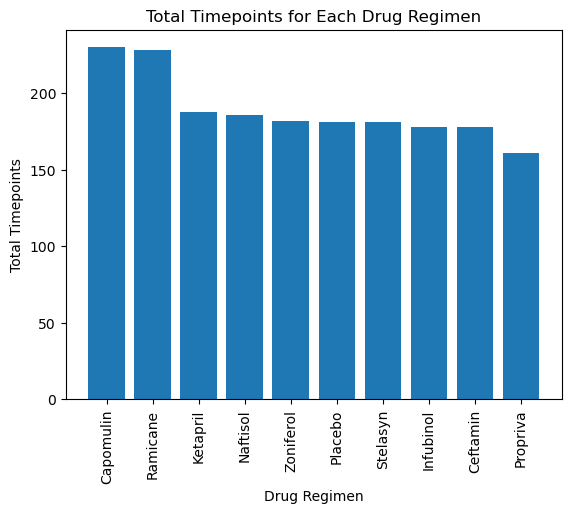

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# getting regimens counts
regimen_counts = combined_data["Drug Regimen"].value_counts()

# Create the pyplot.
plt.bar(regimen_counts.index.values, regimen_counts.values)

# Set labels and title for the plot.
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")
plt.title("Total Timepoints for Each Drug Regimen")
plt.xticks(rotation = 90)

# Show the plot.
plt.show()

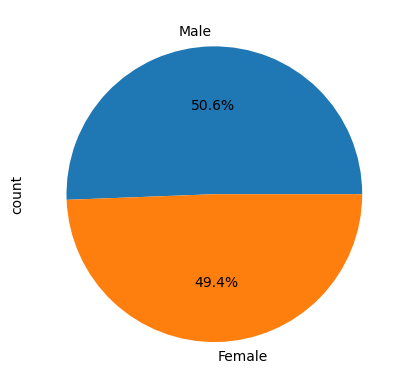

In [12]:
# # Generate a pie plot showing the distribution of female versus male mice using pandas
# Plot the pie chart
sex_counts = combined_data["Sex"].value_counts()
sex_counts.plot(kind="pie",autopct='%1.1f%%')
plt.show()

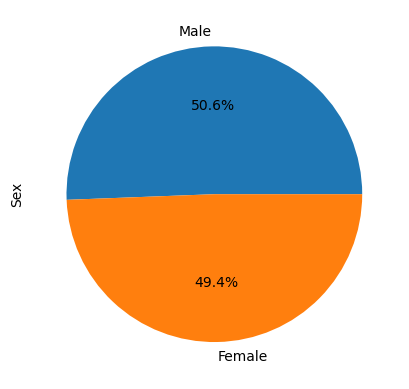

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# getting regimens counts
sex_counts = combined_data["Sex"].value_counts()

# Create the pyplot.
plt.pie(sex_counts.values, labels = sex_counts.index.values, autopct='%1.1f%%')

# Set labels.
plt.ylabel("Sex")

# Show the plot.
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# This is the list of the drug regimens
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time_point = clean_df.groupby("Mouse ID")["Timepoint"].max()
max_time_point = max_time_point.reset_index()
# max_time_point

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_merged_df = max_time_point.merge(clean_df, on=["Mouse ID","Timepoint"], how="left")
last_merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_regimens =["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data =[]

# Create an empty dictionary to store outliers for each treatment
# outliers_dict = {}

# Loop through each treatment to calculate the IQR and find potential outliers
for treatment in treatments_regimens:  # You should use 'treatments_regimens' here, not 'treatments'
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = last_merged_df.loc[last_merged_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    # Add subset to the tumor_vol list
    tumor_vol_data.append(tumor_vol)

    # Calculate quartiles, IQR, and bounds for the current treatment
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    print(f"The IQR for {treatment}: {iqr}")

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"Potential outliers for {treatment}: {outliers}")


The IQR for Capomulin: 7.781863460000004
Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
The IQR for Ramicane: 9.098536719999998
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
The IQR for Infubinol: 11.477135160000003
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
The IQR for Ceftamin: 15.577752179999997
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


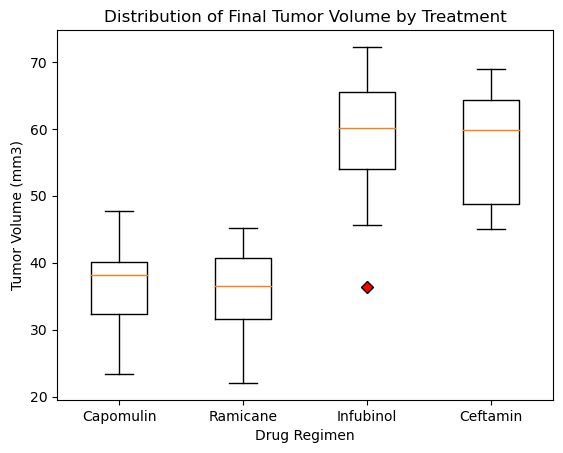

In [16]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

# Create the box plot.
# plt.boxplot(tumor_vol, treatments)
plt.boxplot(tumor_vol_data, labels=treatments_regimens, flierprops=dict(markerfacecolor='r', marker='D'))

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Final Tumor Volume by Treatment')
plt.show()

## Line and Scatter Plots

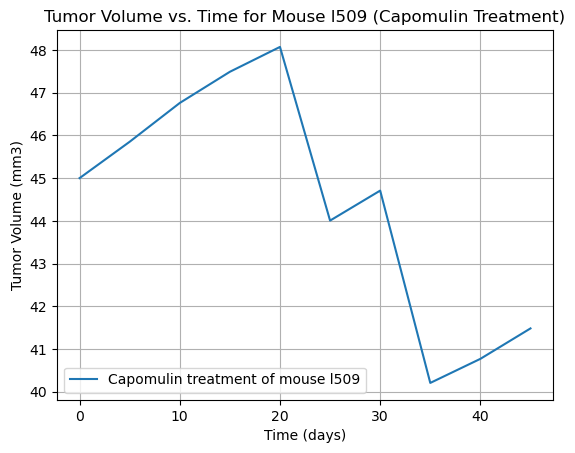

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Define the time points and tumor volume data for the mouse treated with Capomulin

Capomulin_df = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
Mouse_df = Capomulin_df.loc[Capomulin_df["Mouse ID"]=="l509"]


# Generate the line plot
plt.plot(Mouse_df["Timepoint"],Mouse_df["Tumor Volume (mm3)"], label="Capomulin treatment of mouse l509")

# Set plot title, labels, and legend
plt.title("Tumor Volume vs. Time for Mouse l509 (Capomulin Treatment)")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

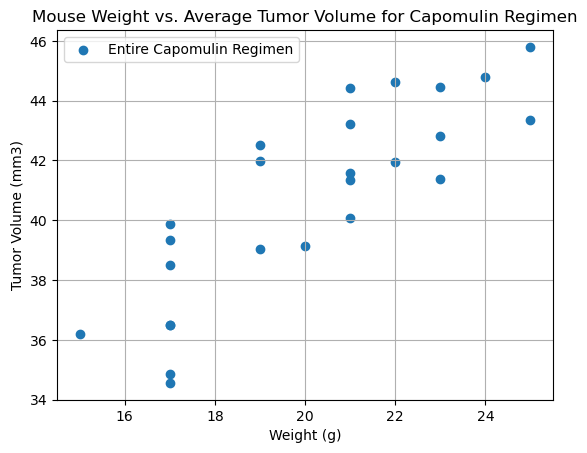

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Plot the data
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]

Capomulin_df2= Capomulin_df.groupby(["Mouse ID"])[["Weight (g)","Tumor Volume (mm3)"]].mean()

# Generate a scatter plot
plt.scatter(Capomulin_df2["Weight (g)"],Capomulin_df2["Tumor Volume (mm3)"],label="Entire Capomulin Regimen")

# Set plot title, labels, and legend
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

## Correlation and Regression

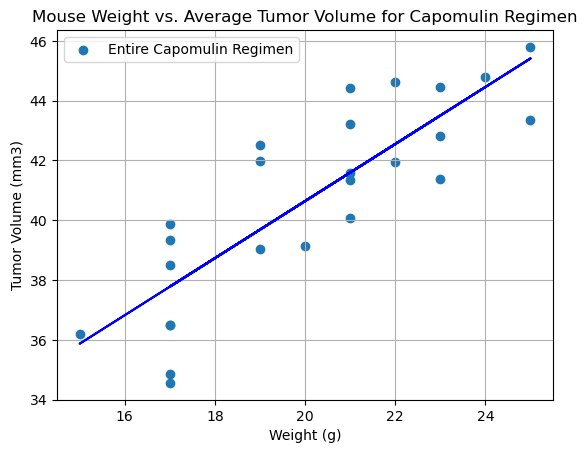

In [21]:
# Calculate the correlation coefficient and a linear regression model 
correlation_coefficient = round(st.pearsonr(Capomulin_df2["Weight (g)"],Capomulin_df2["Tumor Volume (mm3)"])[0],2)

model=st.linregress(Capomulin_df2["Weight (g)"],Capomulin_df2["Tumor Volume (mm3)"])
yvalues = Capomulin_df2["Weight (g)"]*model[0]+model[1]

# Set plot title, labels, and legend
plt.scatter(Capomulin_df2["Weight (g)"],Capomulin_df2["Tumor Volume (mm3)"],label="Entire Capomulin Regimen")
plt.plot(Capomulin_df2["Weight (g)"],yvalues, color="blue")

# Set plot title, labels, and legend
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
